# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 100 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
# Your code here

import numpy as np

print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)
print("So there are 50000 images in train data and 10000 images in test data. Each image is 32x32 pixels with 3 color chanels.")
print('Number of classes:', len(np.unique(y_train)))

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)
So there are 50000 images in train data and 10000 images in test data. Each image is 32x32 pixels with 3 color chanels.
Number of classes: 100


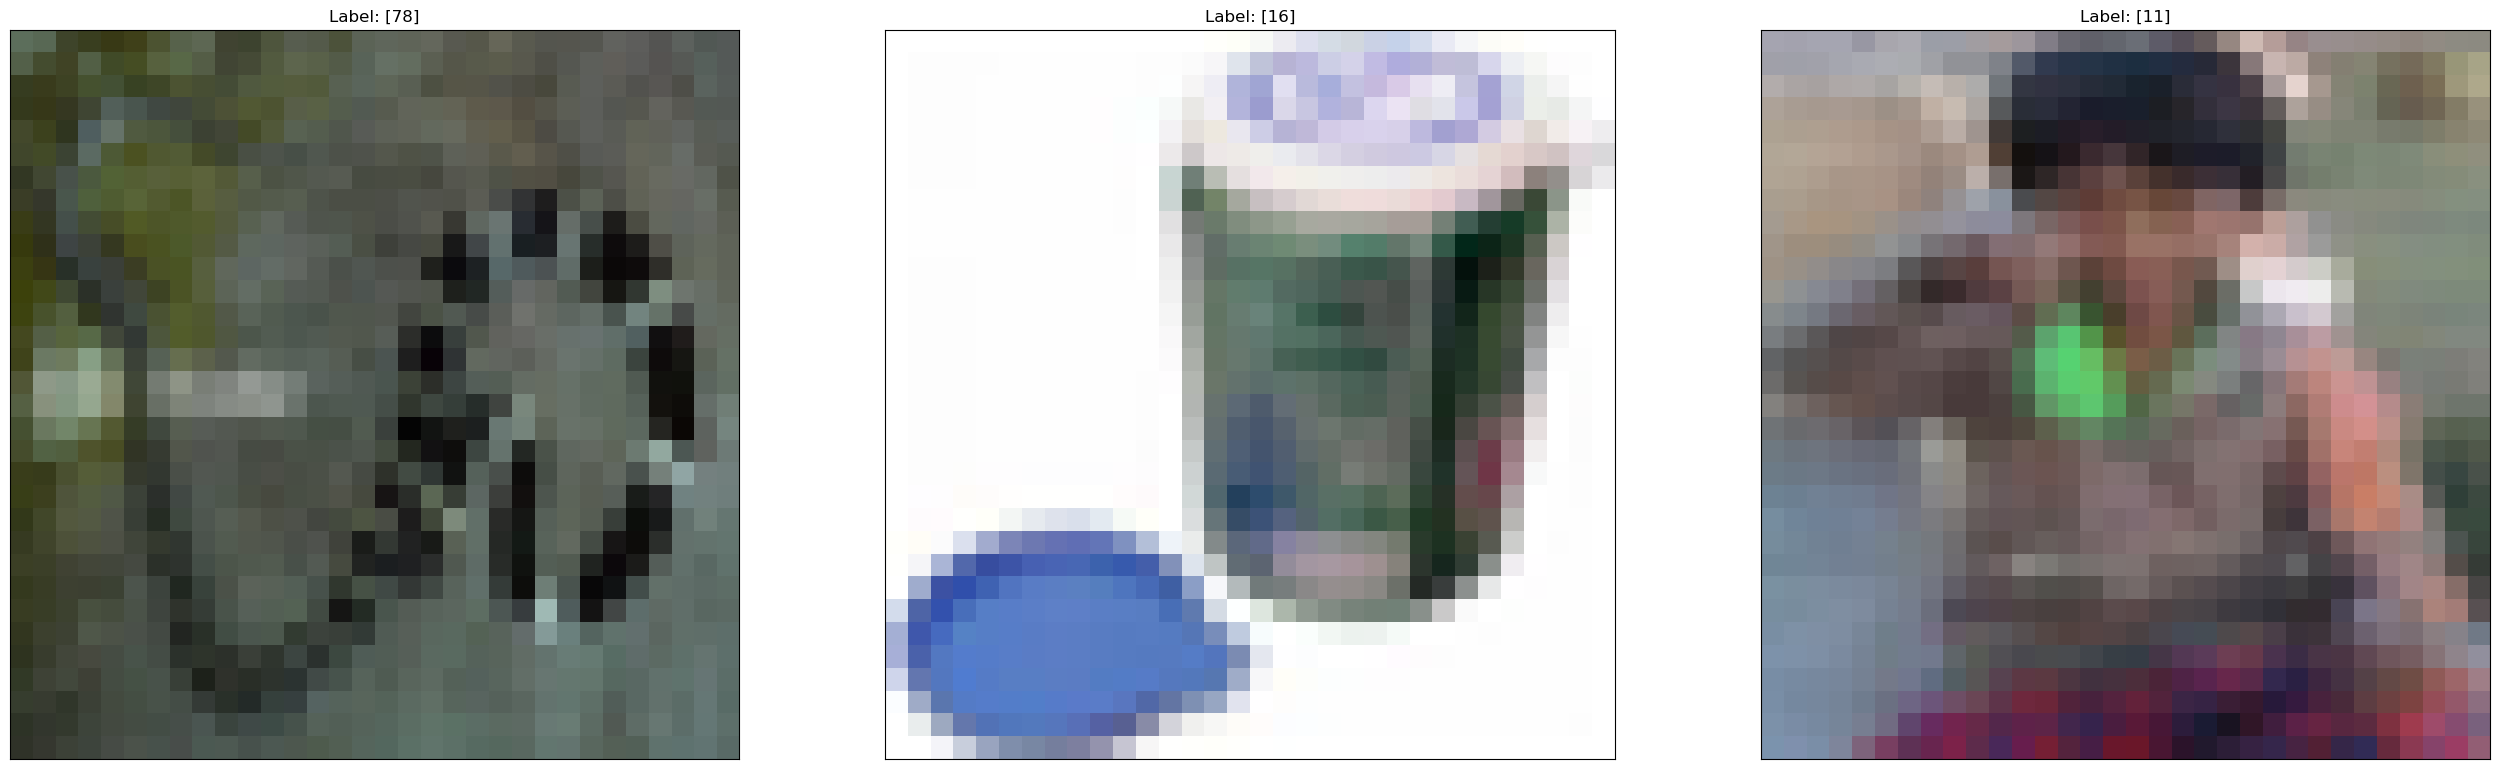

In [ ]:
# Your code here

import matplotlib.pyplot as plt

# Choosing 3 random images from the training set to show

random_indices = np.random.choice(x_train.shape[0], 3, replace=False)

# Creating a 3x1 grid plot
fig, axes = plt.subplots(1, 3, figsize=(32, 32))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[random_indices[i]].astype('uint8'))
    ax.set_title(f"Label: {y_train[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here

# Normalizing the train and test images so that they all have pixel values in the range [0, 1]

max_pix = np.max(x_train)
min_pix = np.min(x_train)
range_pix = max_pix - min_pix

x_train = (x_train - min_pix)/range_pix
x_test = (x_test - min_pix)/range_pix

# Convert the labels to one-hot encoded vectors

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Split the training set into 80% training and 20% validation sets

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train, 
    y_train,
    test_size=0.2, # 20% of the training ata is used for validation
    random_state=42
)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(5, 5), padding='valid',
              input_shape=(32, 32, 3), activation='relu'))

model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model1.add(Flatten())

model1.add(Dense(units=100, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
Total params: 629,732
Trainable params: 629,732
Non-trainable params: 0
_________________________________________________________________


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Because we are predicting which class each image belongs to, we will use the `categorical_crossentropy` function. This loss function is commonly used for multi-class classification problems. 
- <b>Optimizer:</b> Adam is one of the most popular optimizer for deep learning. It is an adaptive learning rate optimizer. This can be very useful, as it means that we don't need to manually tune the learning rate.

In [6]:
from keras import optimizers

# Your code here

model1.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['accuracy'] # Metrics to evaluate the model
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your code here

history1 = model1.fit(
    x_train, # Training data
    y_train, # Training labels
    epochs=20, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_data=(x_val,y_val) # Use the validation set for validation
)

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 3.5804 - accuracy: 0.1801 - val_loss: 3.2038 - val_accuracy: 0.2522
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.8972 - accuracy: 0.3070 - val_loss: 3.0771 - val_accuracy: 0.2836
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.5615 - accuracy: 0.3729 - val_loss: 3.0667 - val_accuracy: 0.3004
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2695 - accuracy: 0.4332 - val_loss: 3.1051 - val_accuracy: 0.3037
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.0049 - accuracy: 0.4935 - val_loss: 3.2447 - val_accuracy: 0.3003
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7637 - accuracy: 0.5466 - val_loss: 3.3875 - val_accuracy: 0.3025
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5571 - accuracy: 0.5973 - val_loss: 3.5491 - val_accuracy:

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 27.35%
- <b>Other metric:</b> Negative log likelihood or cross entropy
- <b>Reason for selection:</b> Negative log likelihood is a better metric than accuracy because not only it depends on if the model's prediction (classification) is correct or not but it also depends on how cofident our model is about its prediction. 
- <b>Value of metric:</b> 6.95
- <b>Interpretation of metric value:</b> Having smaller value of log likelihood is better and it means that our model is predicting the classes more correctly and with higher confident. The perfect model has negative log likelihood 0.

In [8]:
# Your code here

cross_entropy, accuracy = model1.evaluate(x_test, y_test)

print(f'Cross entropy: {cross_entropy:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 6.9531 - accuracy: 0.2735
Cross entropy: 6.95
Accuracy: 27.35%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

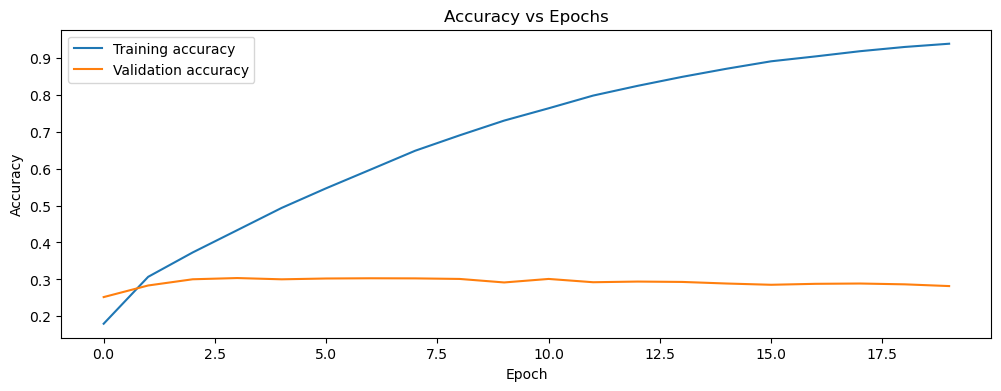

313/313 [==============================] - 1s 2ms/step


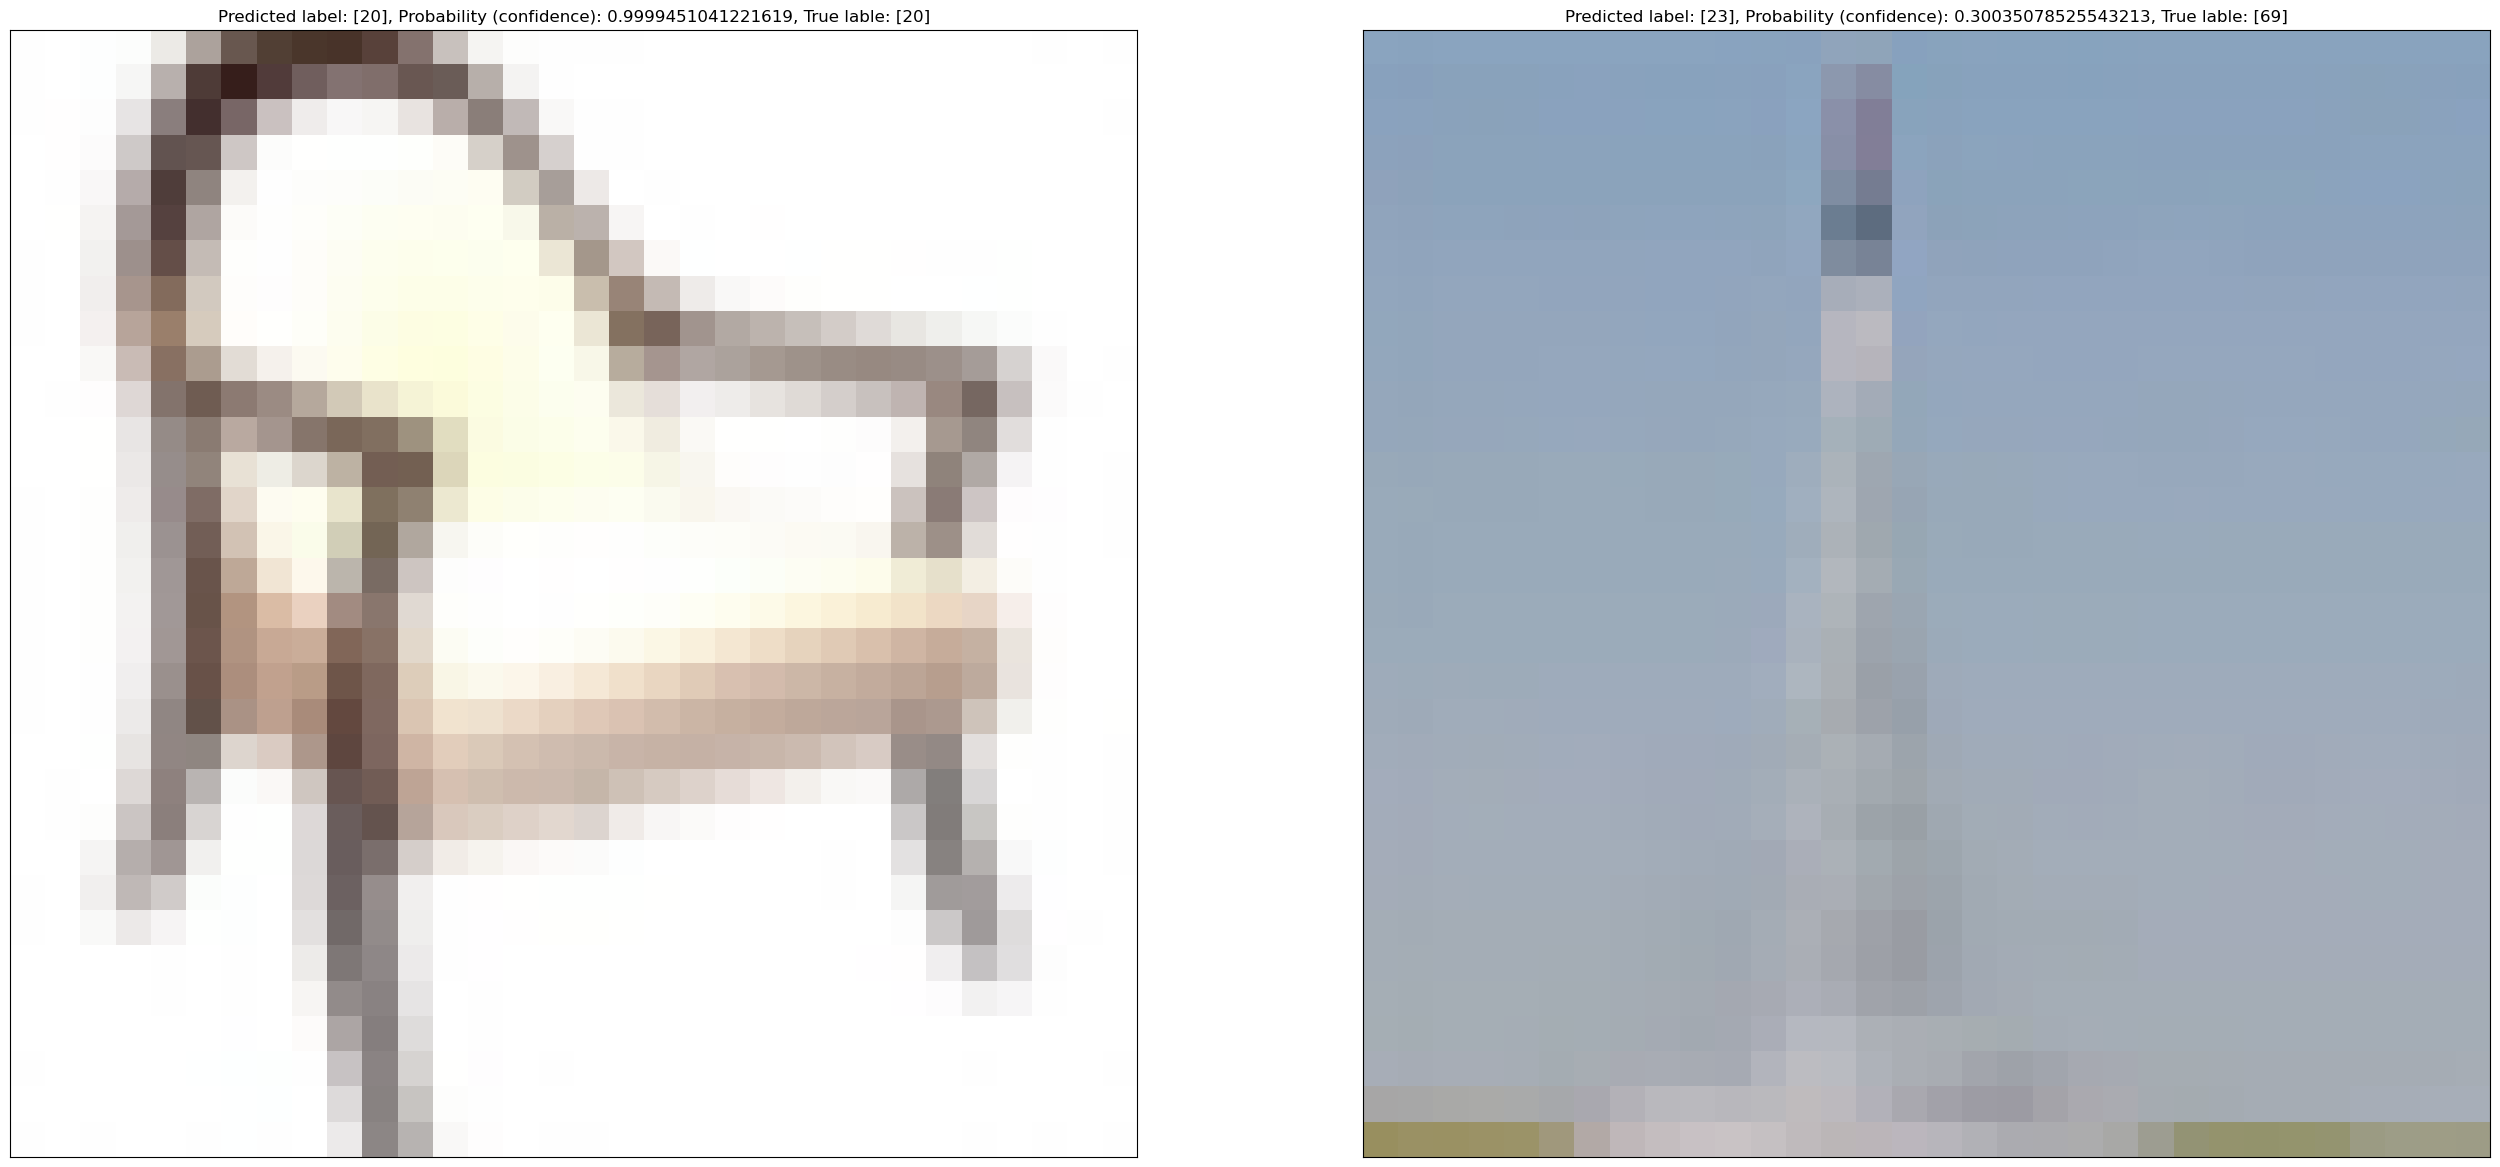

In [ ]:
# Your code here

plt.figure(figsize=(12, 4))
plt.plot(history1.history['accuracy'], label="Training accuracy")
plt.plot(history1.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Get the predictions for the test data
predictions = model1.predict(x_test)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Get the correctly classified samples
classified_indices = np.where(predicted_classes == true_classes)[0]

# Get the misclassified samples
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Randomly pick one misclassified sample and one correctly classified sample
classified_index = classified_indices[np.random.choice(len(classified_indices), 1)]
misclassified_index = misclassified_indices[np.random.choice(len(misclassified_indices), 1)]
indices = [classified_index, misclassified_index]

fig, axes = plt.subplots(1, 2, figsize=(32, 32))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[indices[i]].squeeze())
    ax.set_title(f"Predicted label: {predicted_classes[indices[i]]}, Probability (confidence): {predictions[indices[i]].max()}, True lable: {true_classes[indices[i]]}")
    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

> Answer: The plot shows that overfitting happened as the training accuracy increases and reaches to a very high value but the validation accuracy after some point starts decreasing and hence resulted to a huge difference between train and validation accuracies. So, to improve the generalization of the model, we need to apply some regularization.

> The classification probabilities indicates how confident the model is about its prediction. For the correct prediction sample the model's confidence is almost 100% but for the misclassified exmple, the model is only 30% sure. This makes sense and it is good. Actually, the quality of pictures are so low that even a human can't recogonize the object in some of pictures. For example, I personally can't say what is the object in the misclassified example. So, it is no surprise that the accuracy of the validation or test set is not so high. We can improve it slightly by more advanced models but I don't think that the test accuracy dramatically increases even for more advanced models.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

> Answer: To improve my model's performance, I got inspiration from VGG-16 architecture. Two convolutional layers with kernel size 3 and relu activation followed by a max pooling 1/2 and then the pattern repeated. Everytime, we double the number of filters until filter size is almotes half of the number classes. Then, we flatten the result and add a dense layer followed by 50% dropout and finally a classification layer using softmax. Note that we noticed overfitting in the previous mode, the dropout layer helps us with overfitting and has a regulariztion effect. 

In [15]:
# Your code here

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

model2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
              
    Flatten(),
    Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=100, activation='softmax')
    ])

model2.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['accuracy'] # Metrics to evaluate the model
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [ ]:
# Your code here

history2 = model2.fit(
    x_train, # Training data
    y_train, # Training labels
    epochs=20, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_data=(x_val,y_val) # Use the validation set for validation
)

Epoch 1/20
1250/1250 [==============================] - 68s 54ms/step - loss: 4.1724 - accuracy: 0.0589 - val_loss: 3.6564 - val_accuracy: 0.1431
Epoch 2/20
1250/1250 [==============================] - 55s 44ms/step - loss: 3.6374 - accuracy: 0.1405 - val_loss: 3.3282 - val_accuracy: 0.2010
Epoch 3/20
1250/1250 [==============================] - 73s 59ms/step - loss: 3.3496 - accuracy: 0.1919 - val_loss: 3.0777 - val_accuracy: 0.2522
Epoch 4/20
1250/1250 [==============================] - 60s 48ms/step - loss: 3.1489 - accuracy: 0.2283 - val_loss: 2.9178 - val_accuracy: 0.2798
Epoch 5/20
1250/1250 [==============================] - 53s 43ms/step - loss: 2.9983 - accuracy: 0.2573 - val_loss: 2.8136 - val_accuracy: 0.2936
Epoch 6/20
1250/1250 [==============================] - 71s 57ms/step - loss: 2.8779 - accuracy: 0.2787 - val_loss: 2.7470 - val_accuracy: 0.3116
Epoch 7/20
1250/1250 [==============================] - 54s 43ms/step - loss: 2.7724 - accuracy: 0.2996 - val_loss: 2.7178 -

In [17]:
cross_entropy, accuracy = model2.evaluate(x_test, y_test)

print(f'Cross entropy: {cross_entropy:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 2.6397 - accuracy: 0.3651
Cross entropy: 2.64
Accuracy: 36.51%


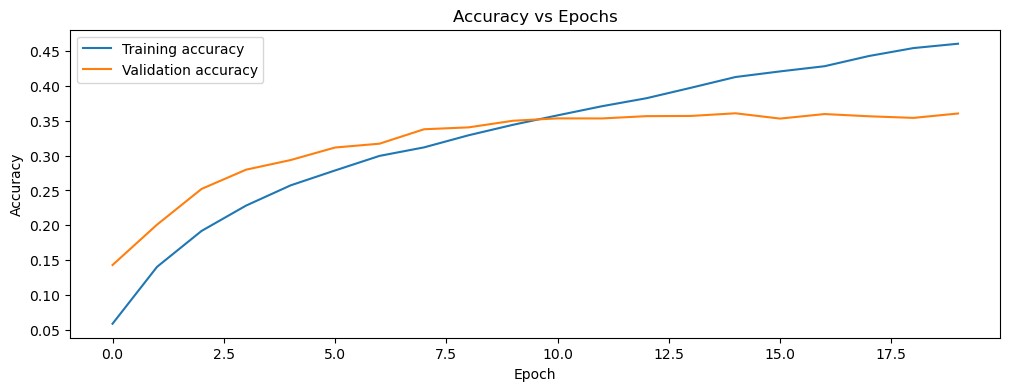

313/313 [==============================] - 1s 4ms/step


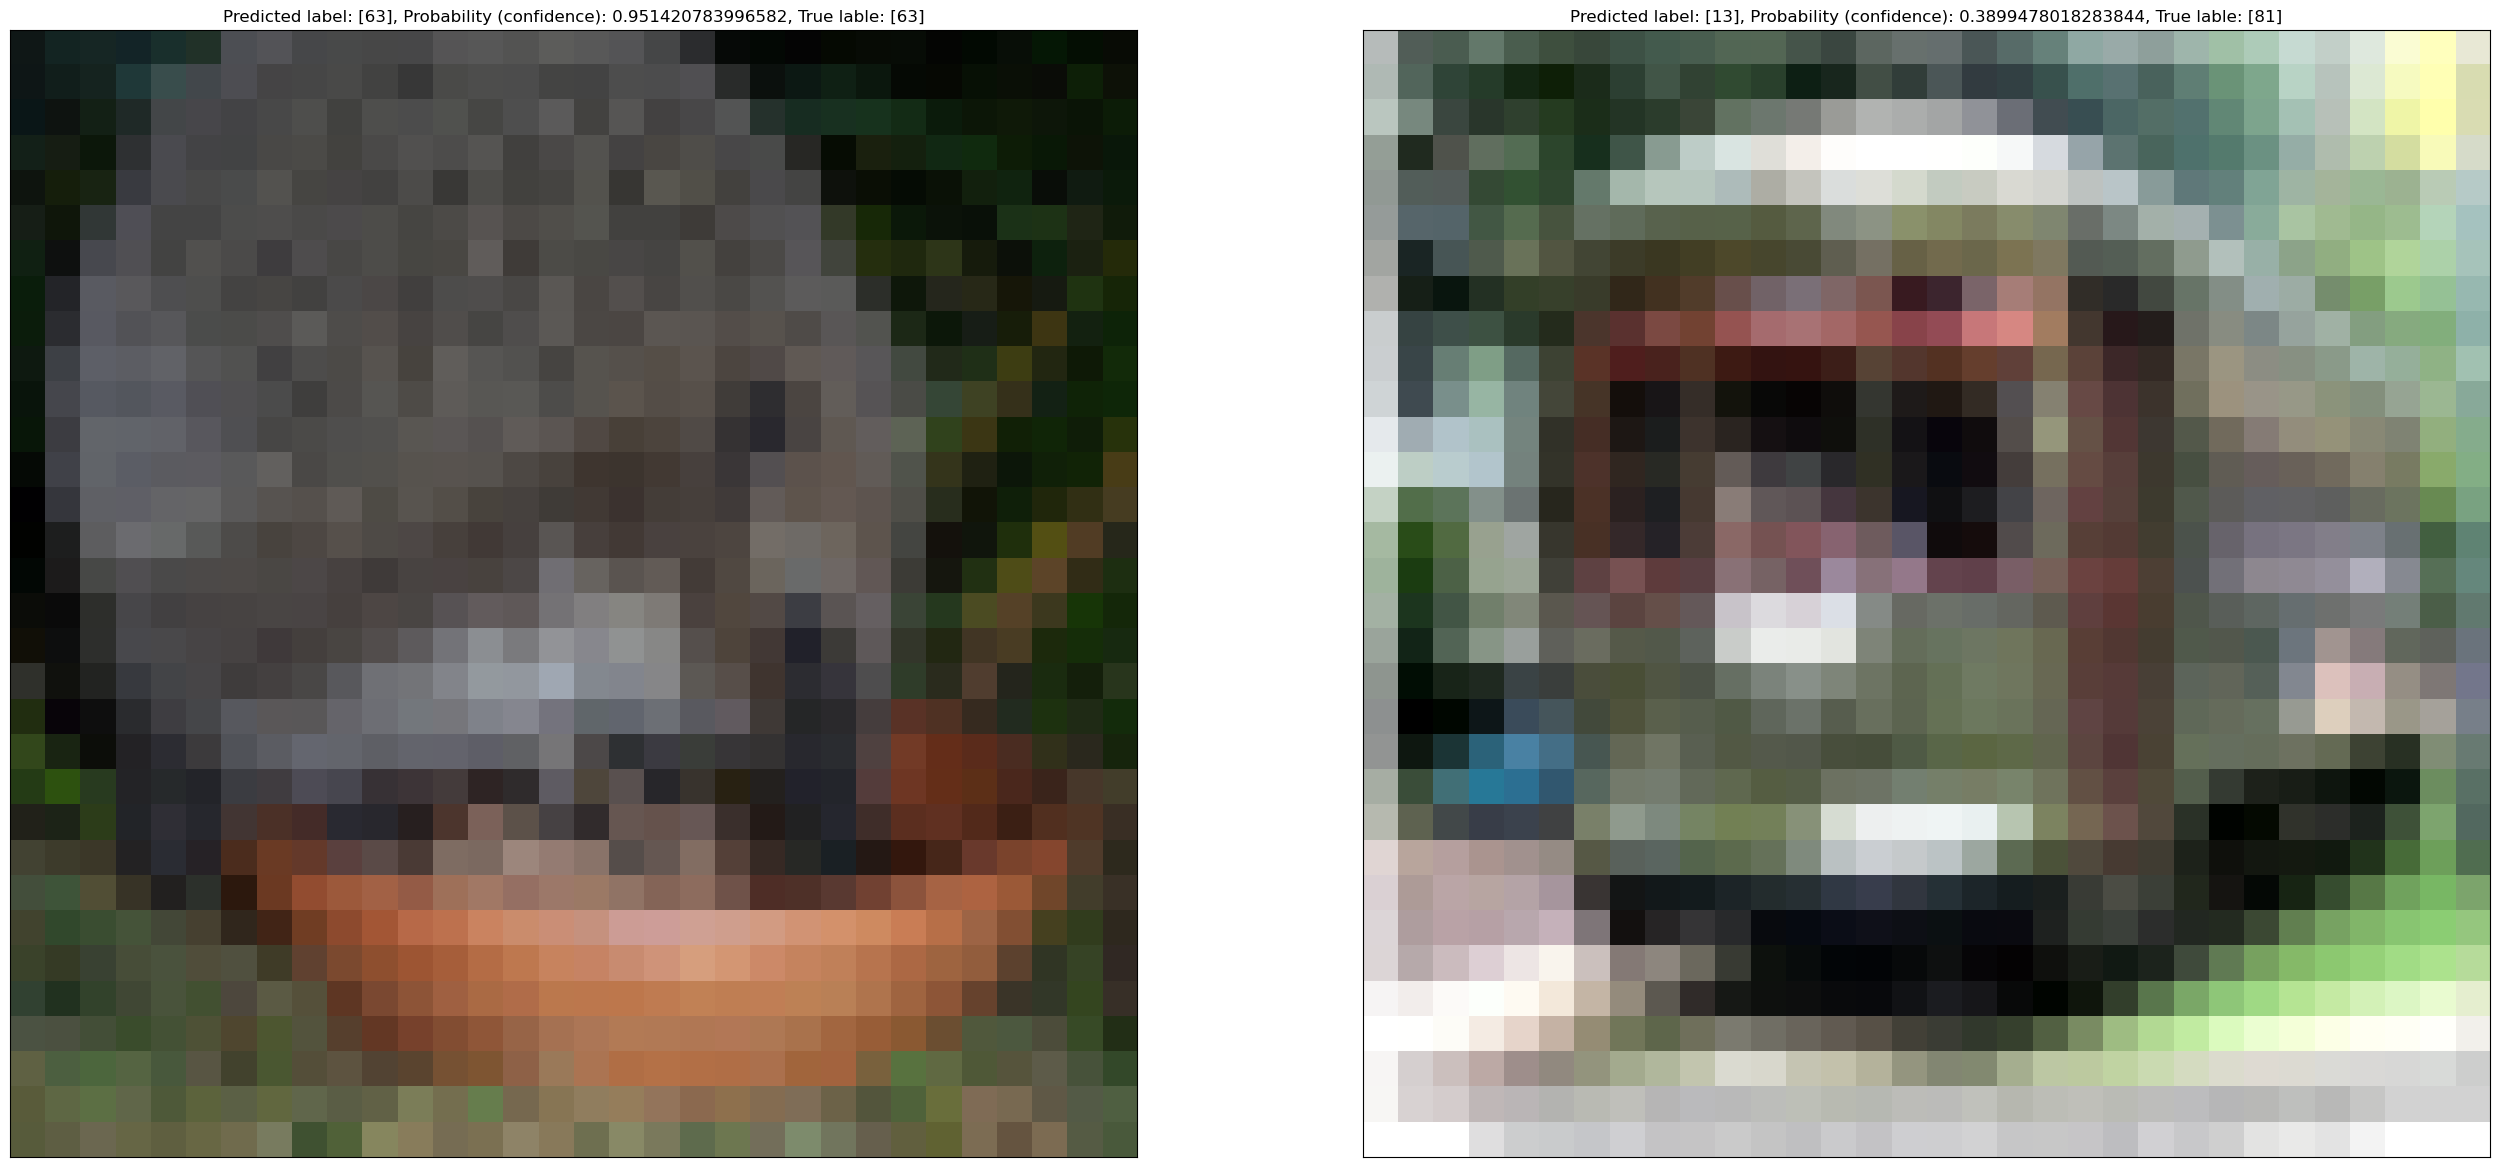

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(history2.history['accuracy'], label="Training accuracy")
plt.plot(history2.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Get the predictions for the test data
predictions = model2.predict(x_test)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Get the correctly classified samples
classified_indices = np.where(predicted_classes == true_classes)[0]

# Get the misclassified samples
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Randomly pick one misclassified sample and one correctly classified sample
classified_index = classified_indices[np.random.choice(len(classified_indices), 1)]
misclassified_index = misclassified_indices[np.random.choice(len(misclassified_indices), 1)]
indices = [classified_index, misclassified_index]

fig, axes = plt.subplots(1, 2, figsize=(32, 32))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[indices[i]].squeeze())
    ax.set_title(f"Predicted label: {predicted_classes[indices[i]]}, Probability (confidence): {predictions[indices[i]].max()}, True lable: {true_classes[indices[i]]}")
    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

> The model's performance improved. The test accuracy increased from 27.35% to 36.51% i.e. it is improved by on third. Because we applied some regularization using dropout, the overfitting is more controlled and it is delayed, and hence the generalization of the model improved. There is some room for improvement but as I mentioned above I don't think that the test accuracy ever reach to a very high level. The next thing I would try is make the model deeper and use the resudual learning.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.